In [110]:
import win32com.client

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
hfssApp = win32com.client.Dispatch("AnsoftHfss.HfssScriptInterface")

In [113]:
desktop = hfssApp.getAppDesktop()


In [114]:
desktop.RestoreWindow()
projeto = desktop.NewProject()
projeto.InsertDesign('HFSS','HFSSDesign1', 'DrivenModal', '')

<COMObject InsertDesign>

In [115]:
design = projeto.SetActiveDesign('HFSSDesign1')
radiation = design.GetModule('RadField')
editor = design.SetActiveEditor('3D Modeler')
module = design.GetModule('BoundarySetup')
setup = design.GetModule('AnalysisSetup')
report = design.GetModule('ReportSetup')
mesh = design.GetModule('MeshSetup')
outputVariable = design.GetModule('OutputVariable')

In [116]:
step = 0.01
freq = np.arange(1,5+step,step)
freqAnalise = freq[-1]

In [117]:
editor.CreateBox(['NAME:BoxParameters', 'XPosition:=', '-59.59mm', 'YPosition:=','49.25mm',
                   'ZPosition:=', '0mm','XSize:=', '110mm', 'YSize:=', '-98.5mm', 'ZSize:=','-1.57mm'],
                 ['NAME:Attributes', 'Name:=', 'Dieletrico', 'Flags:=', '', 'Color:=', '(132 132 193)',
                  'Transparency:=', 1 , 'PartCoordinateSystem:=', 'Global', 'UDMId:=','',
                  'MaterialValue:=', '"FR4_epoxy"', 'SolveInside:=', 1])

'Dieletrico'

In [118]:
editor.CreateRectangle( ['NAME:RectangleParameters', 'IsCovered:=', 1, 'XStart:=', '-20mm',
                         'YStart:=', '0.25mm', 'ZStart:=', '0mm','Width:=', '-24.6mm',
                         'Height:=', '-0.5mm', 'WhichAxis:=', 'Z'],
                       ['NAME:Attributes', 'Name:=', 'transformador', 'Flags:=','',
                        'Color:=', '(132 132 193)', 'Transparency:=', 0, 
                        'PartCoordinateSystem:=','Global', 'UDMId:=', '', 'MaterialValue:=', '', 
                        'SolveInside:=',1])

'transformador'

In [119]:
editor.CreateRectangle( ['NAME:RectangleParameters', 'IsCovered:=', 1, 'XStart:=', '-44.59mm',
                         'YStart:=', '2.42mm', 'ZStart:=', '0mm', 'Width:=', '-15mm',
                         'Height:=', '-4.84mm', 'WhichAxis:=', 'Z'],
                       ['NAME:Attributes', 'Name:=', 'feed', 'Flags:=','', 'Color:=', '(132 132 193)',
                        'Transparency:=', 0, 'PartCoordinateSystem:=','Global', 'UDMId:=', '',
                        'MaterialValue:=', '', 'SolveInside:=',1])

'feed'

In [120]:
patch = [40,40]
editor.CreateRectangle( ['NAME:RectangleParameters', 'IsCovered:=', 1, 
                         'XStart:=', str(-patch[0]/2)+'mm', 
                         'YStart:=', str(-patch[1]/2)+'mm', 'ZStart:=', '0mm',
                         'Width:=', str(patch[0])+'mm',
                         'Height:=', str(patch[1])+'mm', 'WhichAxis:=', 'Z'],
                       ['NAME:Attributes', 'Name:=', 'patch', 'Flags:=','', 'Color:=','(132 132 193)',
                        'Transparency:=', 0, 'PartCoordinateSystem:=','Global', 'UDMId:=', '',
                        'MaterialValue:=', '', 'SolveInside:=',1])

'patch'

In [121]:
editor.CreateRectangle( ['NAME:RectangleParameters', 'IsCovered:=', 1, 'XStart:=', '-59.59mm',
                         'YStart:=', '-25mm', 'ZStart:=', '-1.57mm','Width:=', '50mm', 
                         'Height:=', '15mm', 'WhichAxis:=', 'X'], 
                         ['NAME:Attributes', 'Name:=', 'porta', 'Flags:=','', 'Color:=','(132 132 193)',
                          'Transparency:=', 0, 'PartCoordinateSystem:=','Global', 'UDMId:=', '', 
                          'MaterialValue:=', '', 'SolveInside:=',1])

'porta'

In [122]:
editor.CreateBox( ['NAME:BoxParameters', 'XPosition:=', '50.41mm', 'YPosition:=','49.25mm',
                   'ZPosition:=', '-31.25mm','XSize:=', '-110mm', 'YSize:=', '-98.5mm',
                   'ZSize:=','62.5mm'],
                 ['NAME:Attributes', 'Name:=', 'Celula', 'Flags:=', '', 'Color:=', '(132 132 193)',
                  'Transparency:=', 1 , 'PartCoordinateSystem:=', 'Global', 'UDMId:=','',
                  'MaterialValue:=', '"vacuum"', 'SolveInside:=', 1])

'Celula'

In [123]:
module.AssignWavePort(['NAME:1', 'Objects:=', ['porta'], 'NumModes:=', 1, 
                       'RenormalizeAllTerminals:=', 1, 'UseLineAlignment:=', 0,
                       'DoDeembed:=', 0,
                       ['NAME:Modes', ['NAME:Mode1', 'ModeNum:=',1, 'UseIntLine:=', 0]],
                       'ShowReporterFilter:=', 0, 'ReporterFilter:=', [1],
                       'UseAnalyticAlignment:=', 0])

In [124]:
module.AssignRadiation(['NAME:Rad1', 'Faces:=', [83,84,85, 86, 87, 88], 'IsIncidentField:=', 0,
                        'IsEnforcedField:=', 0, 'IsFssReference:=', 0, 'IsForPML:=',0,
                        'UseAdaptiveIE:=', 0, 'IncludeInPostproc:=', 1])

In [125]:
editor.CreateRectangle( ['NAME:RectangleParameters', 'IsCovered:=', 1, 'XStart:=', '-59.59mm',
                         'YStart:=', '49.25mm', 'ZStart:=', '-1.57mm', 'Width:=', '110mm',
                         'Height:=', '-98.5mm', 'WhichAxis:=', 'Z'],
                       ['NAME:Attributes', 'Name:=', 'terra', 'Flags:=','', 'Color:=','(132 132 193)',
                        'Transparency:=', 0, 'PartCoordinateSystem:=','Global', 'UDMId:=', '',
                        'MaterialValue:=', '', 'SolveInside:=',1])

'terra'

In [126]:
editor.Unite(['NAME:Selections', 'Selections:=', 'patch,transformador,feed'],
             ['NAME:UniteParameters', 'KeepOriginals:=',0])

In [127]:
module.AssignFiniteCond(['NAME:FiniteCond1', 'Objects:=', ['patch'],
                         'UseMaterial:=',1, 'Material:=', 'copper', 'Roughness:=', '0um',
                         'UseThickness:=', 0, 'InfGroundPlane:=', 0])

In [128]:
module.AssignFiniteCond(['NAME:FiniteCond2', 'Objects:=', ['terra'],
                         'UseMaterial:=',1, 'Material:=', 'copper', 'Roughness:=', '0um',
                         'UseThickness:=', 0,'InfGroundPlane:=', 0])

In [129]:
mesh.AssignLengthOp(['NAME:Length1', 'RefineInside:=', 1, 'Enabled:=',1, 'Objects:=', ['Celula'],
                     'RestrictElem:=', 0, 'NumMaxElem:=', '1000', 'RestrictLength:=', 1,
                     'MaxLength:=', '12.5mm'])

In [130]:
setup.InsertSetup( 'HfssDriven', ['NAME:Setup1', 'Frequency:=', str(freqAnalise)+'GHz',
                                  'MaxDeltaS:=', 0.25, 'UseMatrixConv:=', 0, 'MaximumPasses:=', 10,
                                  'MinimumPasses:=', 1, 'MinimumConvergedPasses:=', 1,
                                  'PercentRefinement:=', 50, 'IsEnabled:=', 1, 'BasisOrder:=', 1,
                                  'UseIterativeSolver:=', 0, 'DoLambdaRefine:=', 1, 
                                  'DoMaterialLambda:=', 1, 'SetLambdaTarget:=',0, 'Target:=', 0.3333,
                                  'UseMaxTetIncrease:=', 0, 'EnableSolverDomains:=',0,
                                  'ThermalFeedback:=', 0, 'NoAdditionalRefinementOnImport:=', 0])

In [131]:
setup.InsertFrequencySweep( 'Setup1', ['NAME:Sweep', 'IsEnabled:=', 1, 'SetupType:=', 'LinearCount',
                                       'StartValue:=', str(freq[0])+'GHz', 
                                       'StopValue:=', str(freq[-1])+'GHz','Count:=', len(freq),
                                       'Type:=', 'Fast', 'SaveFields:=', 1, 'InterpTolerance:=', 0.5,
                                       'InterpMaxSolns:=', 250, 'InterpMinSolns:=', 0,
                                       'InterpMinSubranges:=', 1,'ExtrapToDC:=', 0, 'InterpUseS:=', 1,
                                       'InterpUsePortImped:=', 0, 'InterpUsePropConst:=', 0,
                                       'UseDerivativeConvergence:=', 0,
                                       'InterpDerivTolerance:=', 0.2, 'UseFullBasis:=', 1])

In [132]:
radiation.InsertFarFieldSphereSetup(['NAME:Sphere1', 'UseCustomRadiationSurface:=',0,
                                     'ThetaStart:=', '-180deg', 'ThetaStop:=', '180deg',
                                     'ThetaStep:=', '1deg', 'PhiStart:=','0deg', 
                                     'PhiStop:=', '90deg', 'PhiStep:=', '90deg', 'UseLocalCS:=', 0])

In [133]:
design.Analyze('Setup1')

In [134]:
outputVariable.CreateOutputVariable("S11_python", "db(S(1,1))", "Setup1 : LastAdaptive", "Modal Solution Data", [])

In [135]:
hfss_design = projeto.GetDesign ('HfssDesign1')
result = hfss_design.GetModule('OutputVariable')

In [136]:
S11 = np.zeros_like(freq)
for i in range(len(freq)):
    S11[i] = result.GetOutputVariableValue('S11_python', 'Freq = '+str(freq[i])+'Ghz' ,
                                           'Setup1 : Sweep', 'Modal Solution Data','')

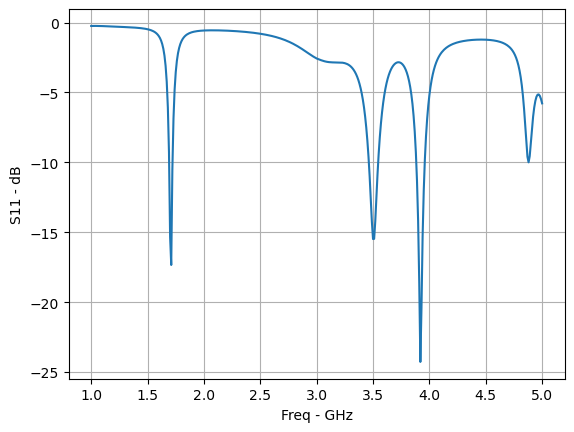

In [137]:
plt.plot(freq,S11)
plt.xlabel('Freq - GHz')
plt.ylabel('S11 - dB')
plt.grid()
plt.show()

In [109]:
projeto.DeleteDesign('HFSSDesign1');
desktop.DeleteProject('Project1');
projeto.release;